### 의사결정나무(DT)
- IF-ELSE 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
- 피쳐(특성) 중에서 선택한 기준으로 데이터 분할
    * 엔트로피 (불순정도) => 낮아지는 방향
    * 정보이득 : 1-엔트로피 => 높아지는 방향
    * 지니계수 : 불평등수치값 => 낮아지는 방향
- 단점 : 과대적합이 될 가능성 높음! 성능이 좋지 않음
- 장점 : 전처리 영향을 받지 않음 / 직관성이 높음 / 피쳐들 중 주요 피쳐 확인 가능
- 주의
    * 여기서의 주요 피쳐는 데이터 분할을 위한 주요 피쳐
    * 100% 데이터의 주요 피쳐가 아닐 수도 있음 => 다른 검사(상관계수, 시각화 등등)와 함께 평가

[1] 모듈 로딩 및 데이터 준비

In [14]:
# 모듈 로딩
import pandas as pd

In [15]:
irisDF = pd.read_csv('../data/iris.csv')

[2] 학습용 데이터셋 준비

[2-1] 피쳐와 타겟 분리

In [16]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
feature = irisDF[irisDF.columns[:-1]]
target = irisDF[irisDF.columns[-1]]

[2-2] 훈련용과 테스트용 데이터셋 분리

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(feature, target,
                                                    test_size=0.2,
                                                    stratify=target)

[3] 기계학습 진행
- 타겟 데이터 확인 결과 : 3개의 분류
- 학습 유형 : 지도학습 + 분류
    * 분류 알고리즘 => KNN, LogisticRegression, SVM-SVC, DecisionTree

[3-1] 의사결정 알고리즘으로 분류

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# 인스턴스 생성 및 학습
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
 # 생성된 모델 구조 시각화
from sklearn.tree import export_graphviz
# dot 언어로 작성된 내용을 시각화 해주는 모듈
from graphviz import Source

In [31]:
# DT 모델의 시각화 정보를 dot 언어로 작성해서 파일로 저장
export_graphviz(model,
                out_file='iris_tree.dot',
                feature_names=feature.columns,
                class_names=model.classes_,
                filled=True
                )

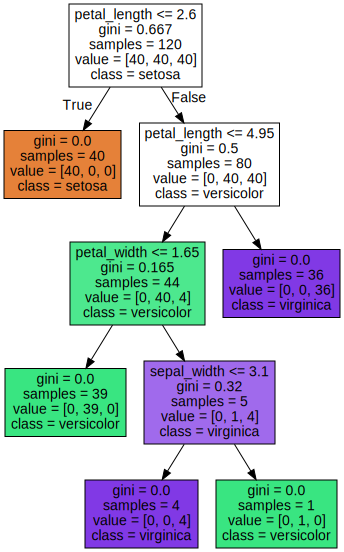

In [33]:
Source.from_file('iris_tree.dot')

[5] 문제 해결 및 성능 향상 즉, 튜닝
- 원인 예상
    * 데이터셋 부족
    * DT의 여러가지 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절
- 해결 방법
    * 2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV

In [34]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [35]:
# 모델 조합 조건
# cv => 기본 5, ...
# DT의 하이퍼파라미터 => max_depth, ..
dt_model = DecisionTreeClassifier()
n_cv = 5
pram = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2,4,6]
}

# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습
# 진행해주는 인스턴스
gs = GridSearchCV(dt_model, param_grid=pram, cv=n_cv)

In [36]:
# 조합된 모델들의 학습 진행
result = gs.fit(X_train, y_train)

In [37]:
# 결과 확인
result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [40]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과 => 조합된 모델의 갯수 만큼
cv_resultDF = pd.DataFrame(gs.cv_results_)
cv_resultDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001328,0.000394,0.001045,0.000056,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
1,0.001717,0.000536,0.000871,0.000438,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
2,0.001250,0.000503,0.001128,0.000030,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
3,0.001446,0.000549,0.001106,0.000027,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
4,0.001427,0.000527,0.000715,0.000493,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
5,0.001095,0.000032,0.000446,0.000524,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
6,0.001114,0.000022,0.000441,0.000540,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
7,0.001292,0.000407,0.001090,0.000063,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
8,0.001282,0.000436,0.000684,0.000530,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.833333,0.916667,1.0,1.0,0.941667,0.062361,19
9,0.001098,0.000028,0.001129,0.000050,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958333,0.875000,0.916667,1.0,1.0,0.950000,0.048591,1


In [43]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
my_best_model = gs.best_estimator_
my_best_model

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
gs.best_score_

0.95

[6] 학습 및 튜닝 후 모델 저장
- 다른 파일에서 활용이 가능한 파일 형태로 저장
- 웹/앱 원하는 곳에서 활용 가능
- scikit-learn에서는 pickle 포맷으로 저장
- joblib 모듈에 해당 기능 포함되어 있음

In [46]:
import joblib
import os

In [49]:
# 모델 저장
model_dir='../model/'
model_filename = model_dir + 'iris_dt.pkl'

# 저장 폴더 존재여부 확인 후 저장
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [50]:
joblib.dump(my_best_model, model_filename)

['../model/iris_dt.pkl']

In [54]:
my_best_model.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)